In [2]:
import pandas as pd

# Load matches data
matches = pd.read_csv('data\matches.csv')

# Load deliveries data
deliveries = pd.read_csv('data\deliveries.csv')

print(matches.head())
print(deliveries.head())


       id   season        city        date match_type player_of_match  \
0  335982  2007/08   Bangalore  2008-04-18     League     BB McCullum   
1  335983  2007/08  Chandigarh  2008-04-19     League      MEK Hussey   
2  335984  2007/08       Delhi  2008-04-19     League     MF Maharoof   
3  335985  2007/08      Mumbai  2008-04-20     League      MV Boucher   
4  335986  2007/08     Kolkata  2008-04-20     League       DJ Hussey   

                                        venue                        team1  \
0                       M Chinnaswamy Stadium  Royal Challengers Bangalore   
1  Punjab Cricket Association Stadium, Mohali              Kings XI Punjab   
2                            Feroz Shah Kotla             Delhi Daredevils   
3                            Wankhede Stadium               Mumbai Indians   
4                                Eden Gardens        Kolkata Knight Riders   

                         team2                  toss_winner toss_decision  \
0        Kolkat

In [3]:
print(matches.info())
print(deliveries.info())

# Check for missing values
print(matches.isnull().sum())
print(deliveries.isnull().sum())

# Fill or drop missing winner or venue if needed
matches.dropna(subset=['winner', 'venue'], inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

             batter  batsman_runs
631         V Kohli          8014
512        S Dhawan          6769
477       RG Sharma          6630
147       DA Warner          6567
546        SK Raina          5536
374        MS Dhoni          5243
30   AB de Villiers          5181
124        CH Gayle          4997
501      RV Uthappa          4954
282      KD Karthik          4843


C:\Users\joys\AppData\Local\Temp\ipykernel_36172\3247315192.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='batsman_runs', y='batter', data=top_batsmen, palette='viridis')


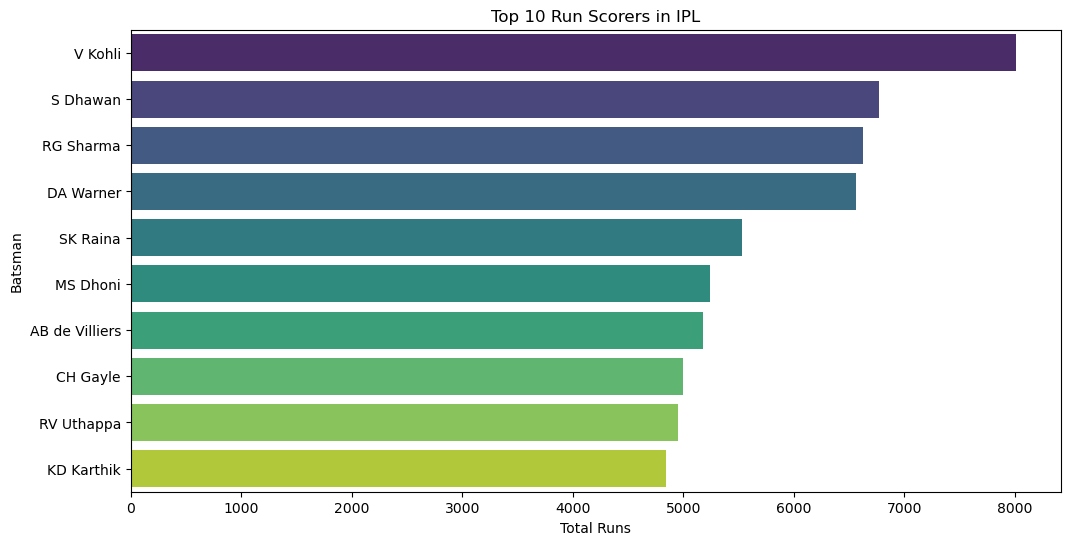

In [5]:
# Total runs by each batsman
top_batsmen = deliveries.groupby('batter')['batsman_runs'].sum().reset_index()
top_batsmen = top_batsmen.sort_values(by='batsman_runs', ascending=False).head(10)

print(top_batsmen)

# Plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.barplot(x='batsman_runs', y='batter', data=top_batsmen, palette='viridis')
plt.title('Top 10 Run Scorers in IPL')
plt.xlabel('Total Runs')
plt.ylabel('Batsman')
plt.show()


         bowler  wickets
445   YS Chahal      205
297   PP Chawla      192
102    DJ Bravo      183
61      B Kumar      181
304    R Ashwin      180
379   SP Narine      180
7      A Mishra      174
372  SL Malinga      170
168   JJ Bumrah      168
319   RA Jadeja      160


C:\Users\joys\AppData\Local\Temp\ipykernel_36172\2220823474.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='wickets', y='bowler', data=top_bowlers, palette='rocket')


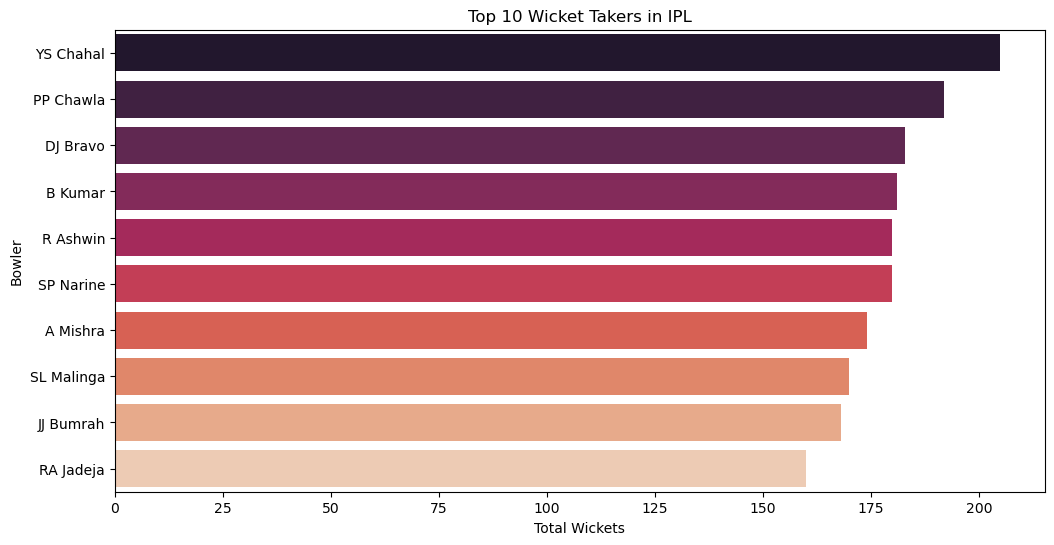

In [6]:
# Filter only valid dismissals for bowlers
wickets = deliveries[deliveries['dismissal_kind'].isin([
    'caught', 'bowled', 'lbw', 'caught and bowled', 'stumped', 'hit wicket'])]

top_bowlers = wickets.groupby('bowler').size().reset_index(name='wickets')
top_bowlers = top_bowlers.sort_values(by='wickets', ascending=False).head(10)

print(top_bowlers)

plt.figure(figsize=(12,6))
sns.barplot(x='wickets', y='bowler', data=top_bowlers, palette='rocket')
plt.title('Top 10 Wicket Takers in IPL')
plt.xlabel('Total Wickets')
plt.ylabel('Bowler')
plt.show()


toss_win_match_win
True     50.825688
False    49.174312
Name: proportion, dtype: float64


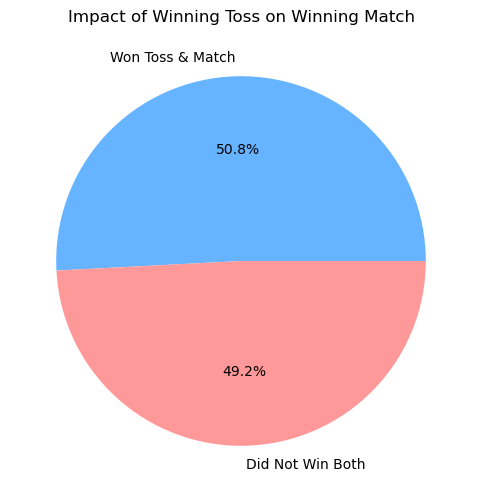

In [7]:
# Create column: Did toss winner win the match?
matches['toss_win_match_win'] = matches['toss_winner'] == matches['winner']

toss_impact = matches['toss_win_match_win'].value_counts(normalize=True) * 100
print(toss_impact)

# Plot
plt.figure(figsize=(6,6))
plt.pie(toss_impact, labels=['Won Toss & Match', 'Did Not Win Both'],
        autopct='%1.1f%%', colors=['#66b3ff','#ff9999'])
plt.title('Impact of Winning Toss on Winning Match')
plt.show()


In [11]:
# Merge venue into deliveries
deliveries_venue = deliveries.merge(
    matches[['id', 'venue']],
    left_on='match_id',
    right_on='id',
    how='left'
)


                                                venue  total_runs
12  Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...  400.000000
1                         Arun Jaitley Stadium, Delhi  380.687500
15                              Eden Gardens, Kolkata  380.312500
24                   M Chinnaswamy Stadium, Bengaluru  380.142857
19  Himachal Pradesh Cricket Association Stadium, ...  378.750000
39  Punjab Cricket Association IS Bindra Stadium, ...  371.200000
43  Rajiv Gandhi International Stadium, Uppal, Hyd...  364.846154
25                              M.Chinnaswamy Stadium  358.857143
5                                   Brabourne Stadium  348.100000
37       Punjab Cricket Association IS Bindra Stadium  347.600000


C:\Users\joys\AppData\Local\Temp\ipykernel_36172\586726751.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='venue', x='total_runs', data=venue_avg.head(10), palette='coolwarm')


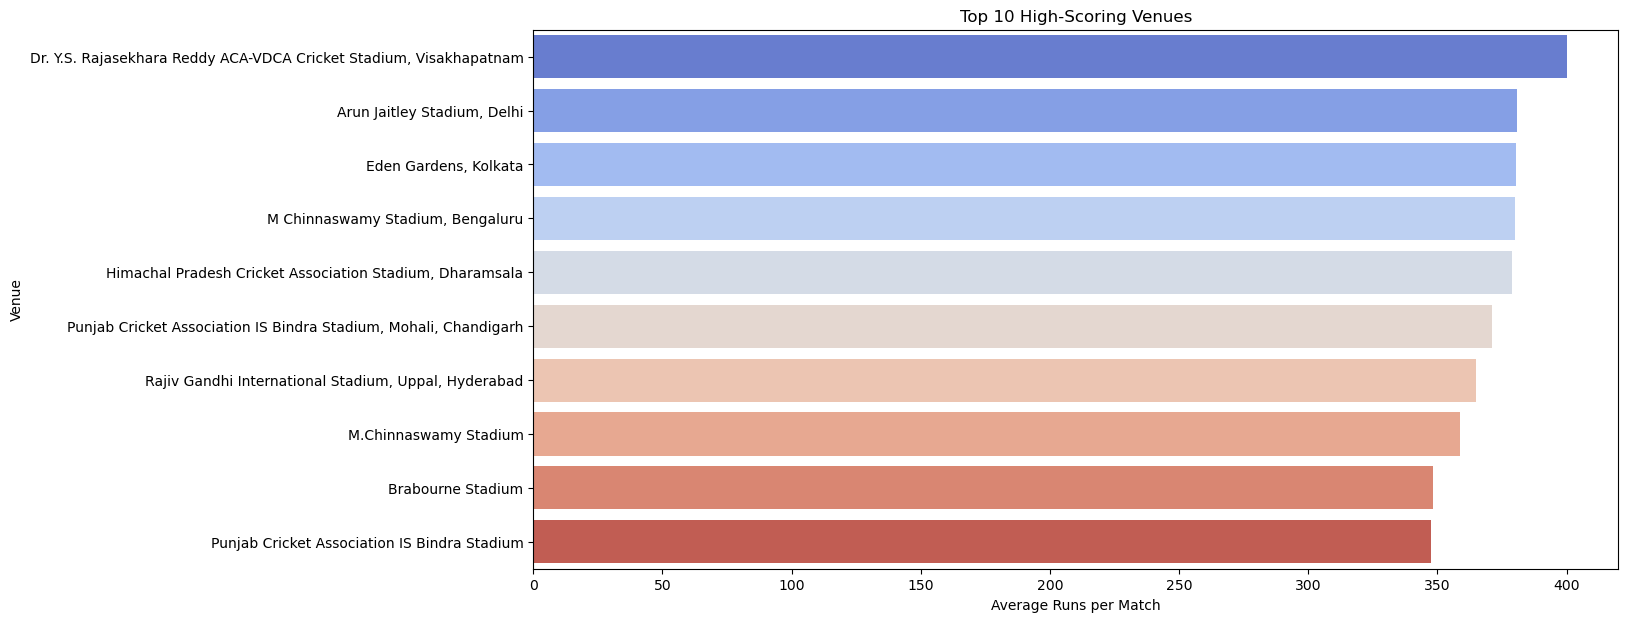

In [12]:
venue_scores = deliveries_venue.groupby(['match_id', 'venue'])['total_runs'].sum().reset_index()
venue_avg = venue_scores.groupby('venue')['total_runs'].mean().reset_index().sort_values(by='total_runs', ascending=False)

print(venue_avg.head(10))

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14,7))
sns.barplot(y='venue', x='total_runs', data=venue_avg.head(10), palette='coolwarm')
plt.title('Top 10 High-Scoring Venues')
plt.xlabel('Average Runs per Match')
plt.ylabel('Venue')
plt.show()
